# Lineare Regression - Projekt Übung - Aufgaben

Glückwunsch, du hast deinen ersten Auftrag mit einer Ecommerce Firma aus New York erhalten. Diese Firma verkauft online Kleidung bietet aber auch Kleidungs- und Styleberatungen in Läden an. Kunden können in den Laden kommen, sich mit einem Stylisten beraten und anschließend per App oder Webseite die Kleidung kaufen, die sie möchten.

Die Firma ist gerade dabei zu entscheiden, ob sie ihren Fokus lieber auf die App oder die Webseite legen sollen. Dein Job ist es sie bei dieser Entscheidung zu unterstützen. Los geht's!

Folge den Anweisungen, um die Kundendaten zu analysieren (selbstverständlich ohne echte Kreditkartennummern und E-Mail-Adressen).

## Imports

**Importiere pandas, numpy, matplotlib und seaborn. Setze außerdem %matplotlib inline.**

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

## Erhalte die Daten

Wir arbeiten mit der "Ecommerce Customers" CSV-Datei von der Firma. Sie beinhaltet Informationen wie E-Mail-Adressen, Addressen usw. Außerdem haben wir numerische Werte in folgenden Spalten vorliegen:

* Avg. Session Length: Durchschnittliche Länge einer Style beratung im Laden.
* Time on App: Durchschnittlich verbrachte Zeit in der App in Minuten.
* Time on Website: Durchschnittlich verbrachte Zeit auf der Homepage in Minuten.
* Length of Membership: Anzahl der Jahre die ein Kunde bereits Mitglied ist.

**Lese die "Ecommerce_Customers" CSV-Datei als DataFrame namens "customers" ein.**

In [35]:
customers = pd.read_csv("C:/Users/OlhaIshchenko/Documents/Daten_Analyse/unterricht/csv_Datei/Ecommerce_Customers.csv")

**Schaue dir den Head von customers an und wende die info() und describe() Methode an.**

In [36]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [37]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [38]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


**Untersuchen wir diese Art von Beziehung für den ganzen Datensatz. Erstelle mit pairplot das nachfolgende Diagramm.**

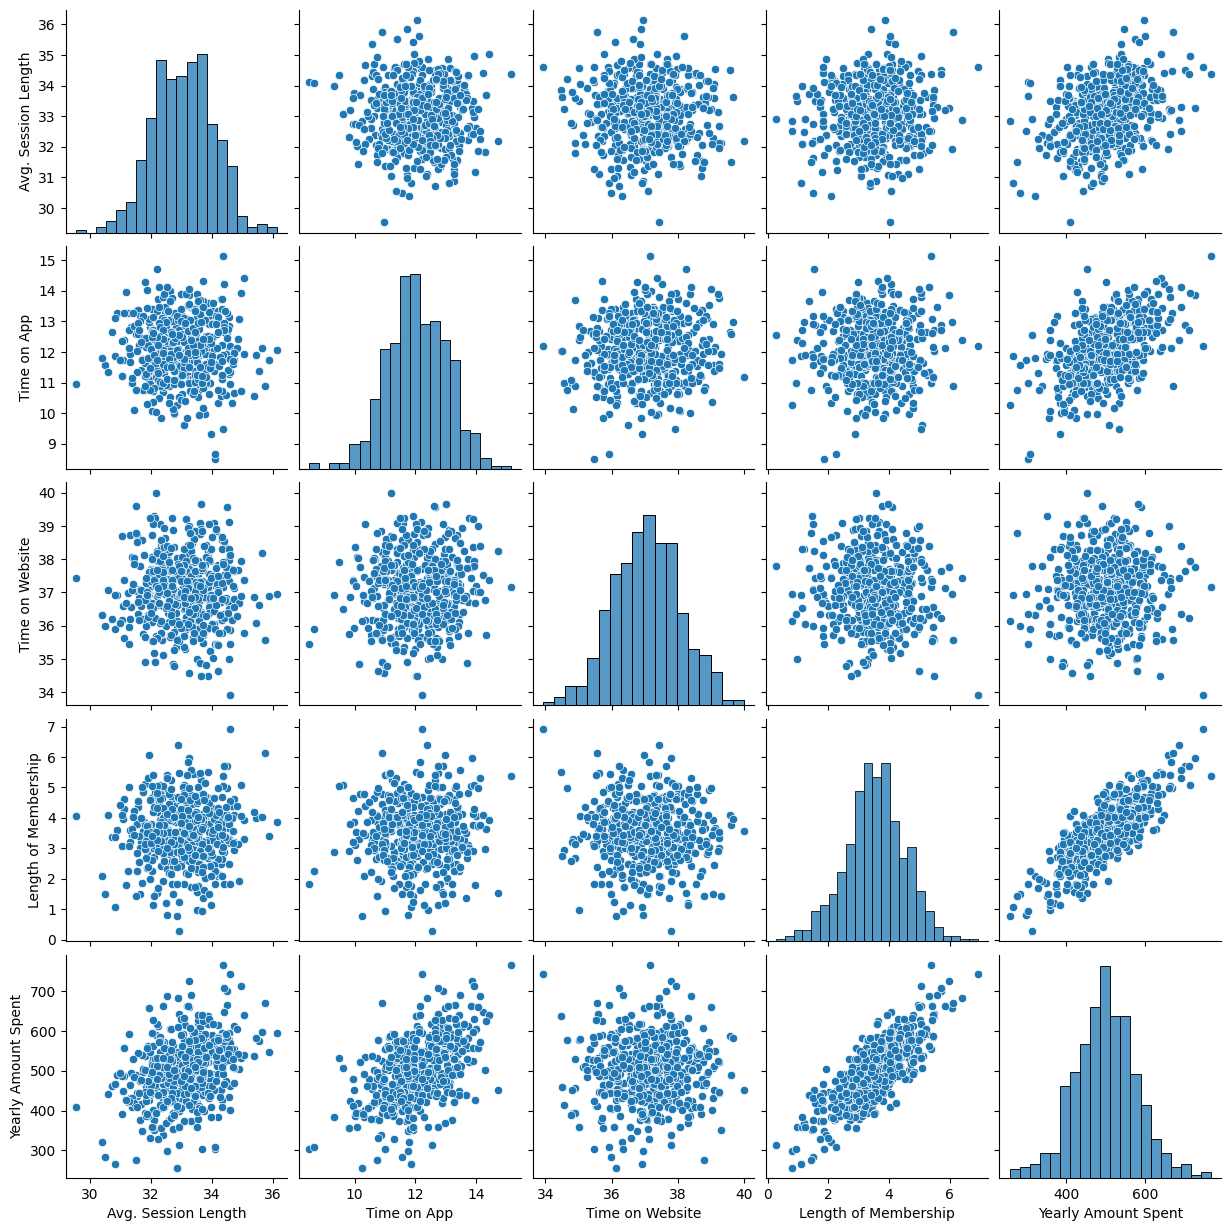

In [39]:
sns.pairplot(customers)

**Erstelle ei linear modell plot ( mit Hilfe sns lmplot) vo jährlichen Ausgaben vs. Länge der Mitgliedschaft**

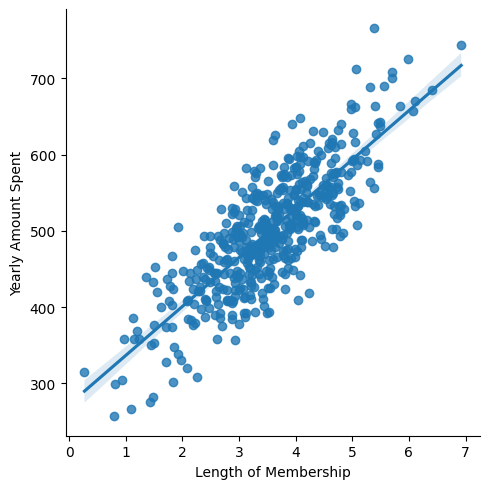

In [40]:
sns.lmplot(x='Length of Membership', y='Yearly Amount Spent', data=customers)

**Anhand dieser Grafik: Was scheint am meistenmit den jährlichen Ausgaben zu korrelieren?**

<Axes: >

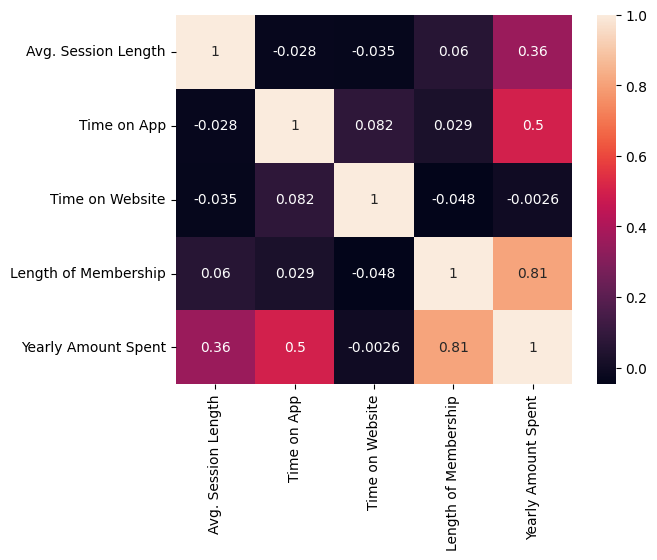

In [41]:
sns.heatmap(customers.select_dtypes(include=np.number).corr(), annot=True)

In [42]:
customers.columns[3:-1]

Index(['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership'],
      dtype='object')

In [43]:
customers[['Avg. Session Length', 'Time on App','Length of Membership','Yearly Amount Spent']].corr()['Yearly Amount Spent']

Avg. Session Length     0.355088
Time on App             0.499328
Length of Membership    0.809084
Yearly Amount Spent     1.000000
Name: Yearly Amount Spent, dtype: float64

## Trainings- und Testdaten

Jetzt wo wir unsere Daten ein wenig untersucht haben können wir fortschreiten und Daten in Trainings- und Testdaten aufteilen. 

**Setze eine Variable X gleich den numerischen Features der Kunden und eine Variable Y gleich der "Yearly Amount Spent" Spalte.**

In [44]:
X = customers[['Avg. Session Length', 'Time on App','Time on Website','Length of Membership']]

In [45]:
y = customers['Yearly Amount Spent']

**Nutze model_selection.train_test_split aus sklearn, um die Daten in Trainings- und Testdaten zu trennen. Setze dabei test_size=0.3 und random_state=101.**

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=101)

## Das Modell trainieren

Als nächstes können wir unser Modell mit den Trainingsdaten trainieren!

**Importiere LinearRegression aus sklearn.linear_model.**

**Erstelle eine Instanz von LinearRegression() namens lm.**

In [47]:
lm = LinearRegression()

**Trainiere lm mit den Trainingsdaten.**

In [48]:
lm.fit(X_train, y_train)
# LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression()

**Gebe die Koeffizienten des Modells aus.**

In [49]:
#Coefficients: [ 25.98154972  38.59015875   0.19040528  61.27909654]
print('Coefficients: ', lm.coef_)

Coefficients:  [25.98154972 38.59015875  0.19040528 61.27909654]


## Testdaten voraussagen

Nachdem wir unser Modell trainiert haben können wir seine Güte mit den Testdaten überprüfen.

**Nutze lm.predict(), um die X_test Daten vorherzusagen.**

In [50]:
y_predict = lm.predict(X_test)

**Erstelle ein Scatterplot mit den echten Testwerten im vergleich zu den vorhergesagten.**

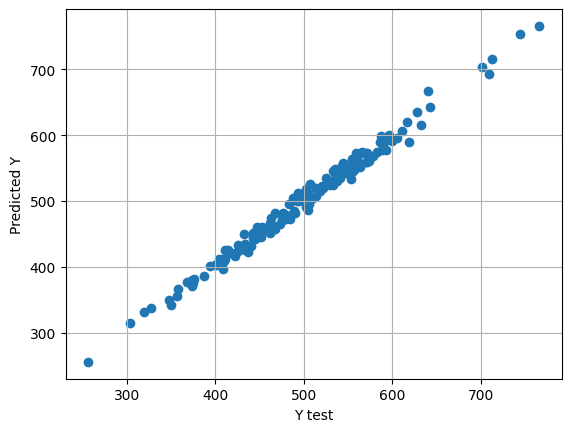

In [51]:
plt.scatter(y_test, y_predict)
plt.grid()
plt.xlabel('Y test')
plt.ylabel('Predicted Y');

## Das Modell bewerten

Lass uns unser Modell indem wir die Residual Sum of Squares und die erklärte Varianz (R^2) ausrechnen.

**Berechne MAE, MSE und RMSE.**

*[Theorie & Python Implementation (englisch)](https://www.dataquest.io/blog/understanding-regression-error-metrics/)*<br>

In [57]:
mae_sum = 0
mse_sum = 0
len_y_test = len(y_test)
for y_t, y_p in zip(y_test, y_predict):
    mae_sum += abs(y_t - y_p)
    mse_sum += (y_t - y_p)**2

mae = mae_sum / len_y_test
mse = mse_sum / len_y_test
rmse = np.sqrt(mse)
print('MAE: ', mae)
print('MSE: ', mse)
print('RMSE: ', rmse)

print('R^2: ', lm.score(X_test, y_test))  #metrics.r2_score(y_test, y_predictions)
print('R^2_train: ', lm.score(X_train, y_train))
# MAE: 7.22814865343
# MSE: 79.813051651
# RMSE: 8.93381506698

MAE:  7.228148653430824
MSE:  79.81305165097426
RMSE:  8.933815066978623
R^2:  0.9890046246741234
R^2_train:  0.9817562058732432


## Residuen

Du solltest ein sehr gutes Modell mit einem guten Modelfit erhalten haben. Lass uns schnell noch die Residuen untersuchen, um sicher zu gehen, dass alles mit unseren Daten okay war.

**Erstelle ein Histogramm der Residuen und gehe sicher, dass es normalverteilt aussieht. Nutze entweder searborn distplot oder einfach plt.hist().**

<Figure size 1000x1200 with 0 Axes>

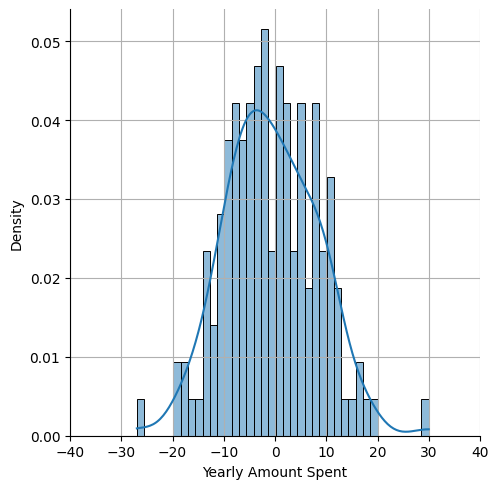

In [53]:
plt.figure(figsize=(10,12))
sns.displot(y_test - y_predict, stat='density', bins=40, kde=True)
plt.grid(True)
plt.xlim(-40, 40);

## Schlussfolgerungen

Wir wollen immer noch die ursprüngliche Fragestellung beantworten: sollten wir unsern Fokus auf die App oder die Webseite legen? Oder ggf. spielt das gar keine große Rolle und die Jahre der Mitgliedschaft sind wirklich ausschlaggebend. Schauen wir dazu nach, ob wir die Koeffizienten interpretieren können.

**Baue den dargestellten DataFrame nach.**

In [54]:
coef = {'Coeffecient': lm.coef_}
df_coef = pd.DataFrame(coef, index=customers.columns[3:-1]) #index=X.columns, columns=['Coeffecient']
df_coef

,Coeffecient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


**Wie kannst du diese Koeffizienten interpretieren?**



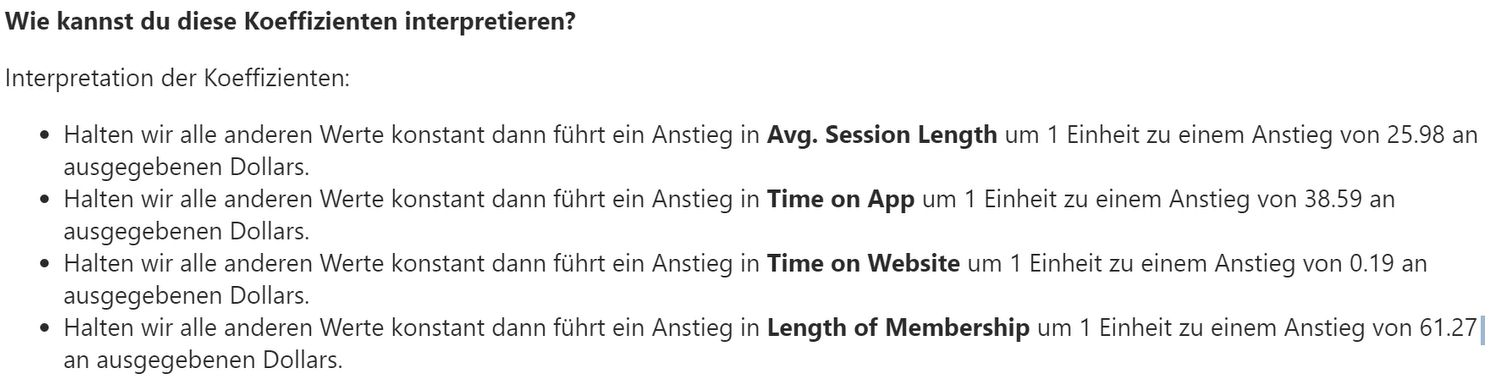

In [55]:
# je größe der Koeffizient ist, desto größer ist sein Einfluss

**Denkst du die Firma sollte sich eher auf die App oder die Webseite fokusieren?**





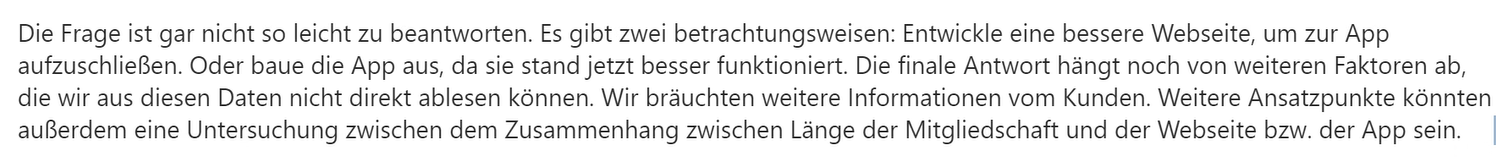

In [56]:
#App, weil der Koeffizient größer ist.

# Gut gemacht!

Glückwunsch zur Erfüllung deines ersten Auftrags! Die Firma war sehr dankbar für die Einblicke. Weiter geht's!